In [5]:
from b1 import *
from urllib.request import urlopen
import json
import numpy as np
import pandas as pd
import os
import copy
import math
import statistics
import sklearn.metrics as metrics
 
# Evitar truncar data mostrada al usar jupyter notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
 
# Constante que aloja el diccionario JSON con toda la data
DATA = None

# Obtener data JSON
if os.path.exists('./out/dataout.json'):
    DATA = json.load(open('./out/dataout.json', 'r'))
else:
    data_url = urlopen('http://nutriexcel.cl/UMDU/dataout_v2.json')
    DATA = json.loads(data_url.read())
 
# Labels base de las columnas
LABELS_BASE = {
    # Parámetros del alumno (Target)
    'p1':                            ['p1'],
    'p2':                            ['p2'],
    'np':                            ['np'],
    'p1p2':                          ['p1p2'], # Promedio p1p2 y p2p2
    'p2p2':                          ['p2p2'],
    
    # Parámetros del laboratorio (Features)
    'grade':                         ['g_lab#'],
    'attempts':                      ['a_lab#'],
    'usedtime':                      ['ut_lab#'],
    'activetime':                    ['act_lab#'],
    'disconnections':                ['dis_lab#'],      # log
    'compilationtime':               ['ct_lab#'],
    'runtimedebuggingtime':          ['rt_lab#'],
    'compilationtimeratio':          ['ctr_lab#'],
    'runtimedebuggingtimeratio':     ['rtr_lab#'],
    'errorsreductionratio':          ['err_lab#'],
    'compilationerrorsratio':        ['cer_lab#'],
    'activequartiles':               ['actq1_lab#','actq2_lab#','actq3_lab#'],
    'questionsdifficulty':           ['qd$_lab#'],
    'questionsgrades':               ['qg$_lab#'],      # Promedio
    'questionsattempts':             ['qat$_lab#'],     # Sumar - Max   # log
    'questionsactivetime':           ['qact$_lab#'],    # Promedio
    'questionsavgtime':              ['qavt$_lab#'],    # Promedio
    'questionsmaxerrors':            ['qme$_lab#'],     # Max
    'questionsmaxconsecutiveerrors': ['qmce$_lab#'],    # Max
    'questionsmaxsimilarityratio':   ['qmsr$_lab#'],    # Promedio
    'questionscorrectness':          ['qc$_lab#']       # Promedio
}
 
 
# Cantidad de preguntas por lab
LABS_LENGTHS = {
    '1': 7,
    '2': 6,
    '3': 6,
    '4': 5,
    '5': 3
}

In [7]:
#@title **Data preparation**
#Se preparan los datos de los laboratorios
# Get dataframe
datalab1_all = get_custom_dataframe(DATA, [1], ['p1p2','p2p2'], 'all', labels=True, index=None)

datalab1 = copy.deepcopy(datalab1_all)
 
# Remove questionsdifficulty
remove_col(datalab1, 'qd?')
# Group columns
datalab1_all = apply(datalab1_all, ['p1p2','p2p2'], statistics.mean)
datalab1 = apply(datalab1, ['p1p2','p2p2'], statistics.mean)
datalab1 = apply(datalab1, 'dis_lab1', norm_log)
datalab1 = apply(datalab1, 'qg?', statistics.mean)
datalab1 = apply(datalab1, 'qat?', sum, replace=False)
datalab1 = apply(datalab1, 'sum(qat$_lab1)', norm_log, replace=False)
datalab1 = apply(datalab1, 'qat?', max)
datalab1 = apply(datalab1, 'qact?', statistics.mean)
datalab1 = apply(datalab1, 'qavt?', statistics.mean)
datalab1 = apply(datalab1, 'qme?', max)
datalab1 = apply(datalab1, 'qmce?', max)
datalab1 = apply(datalab1, 'qmsr?', statistics.mean)
datalab1 = apply(datalab1, 'qc?', statistics.mean)
aux = datalab1['act_lab1'] / datalab1['sum(qat$_lab1)']
for i in range(len(aux)):
    if not aux[i] > 0:
        aux[i] = 0
datalab1['avgtime_lab1'] = aux
datalab1 = datalab1.round(4)
 
 
# Get dataframe
datalab2_all = get_custom_dataframe(DATA, [2], ['p1p2','p2p2'], 'all', labels=True, index=None)
 
datalab2 = copy.deepcopy(datalab2_all)
 
# Remove questionsdifficulty
remove_col(datalab2, 'qd?')
# Group columns
datalab2_all = apply(datalab2_all, ['p1p2','p2p2'], statistics.mean)
datalab2 = apply(datalab2, ['p1p2','p2p2'], statistics.mean)
datalab2 = apply(datalab2, 'dis_lab2', norm_log)
datalab2 = apply(datalab2, 'qg?', statistics.mean)
datalab2 = apply(datalab2, 'qat?', sum, replace=False)
datalab2 = apply(datalab2, 'sum(qat$_lab2)', norm_log, replace=False)
datalab2 = apply(datalab2, 'qat?', max)
datalab2 = apply(datalab2, 'qact?', statistics.mean)
datalab2 = apply(datalab2, 'qavt?', statistics.mean)
datalab2 = apply(datalab2, 'qme?', max)
datalab2 = apply(datalab2, 'qmce?', max)
datalab2 = apply(datalab2, 'qmsr?', statistics.mean)
datalab2 = apply(datalab2, 'qc?', statistics.mean)
aux = datalab2['act_lab2'] / datalab2['sum(qat$_lab2)']
for i in range(len(aux)):
    if not aux[i] > 0:
        aux[i] = 0
datalab2['avgtime_lab2'] = aux
datalab2 = datalab2.round(4)
 
 
# Get dataframe
datalab3_all = get_custom_dataframe(DATA, [3], ['p1p2','p2p2'], 'all', labels=True, index=None)
 
datalab3 = copy.deepcopy(datalab3_all)
 
# Remove questionsdifficulty
remove_col(datalab3, 'qd?')
# Group columns
datalab3_all = apply(datalab3_all, ['p1p2','p2p2'], statistics.mean)
datalab3 = apply(datalab3, ['p1p2','p2p2'], statistics.mean)
datalab3 = apply(datalab3, 'dis_lab3', norm_log)
datalab3 = apply(datalab3, 'qg?', statistics.mean)
datalab3 = apply(datalab3, 'qat?', sum, replace=False)
datalab3 = apply(datalab3, 'sum(qat$_lab3)', norm_log, replace=False)
datalab3 = apply(datalab3, 'qat?', max)
datalab3 = apply(datalab3, 'qact?', statistics.mean)
datalab3 = apply(datalab3, 'qavt?', statistics.mean)
datalab3 = apply(datalab3, 'qme?', max)
datalab3 = apply(datalab3, 'qmce?', max)
datalab3 = apply(datalab3, 'qmsr?', statistics.mean)
datalab3 = apply(datalab3, 'qc?', statistics.mean)
aux = datalab3['act_lab3'] / datalab3['sum(qat$_lab3)']
for i in range(len(aux)):
    if not aux[i] > 0:
        aux[i] = 0
datalab3['avgtime_lab3'] = aux
datalab3 = datalab3.round(4)
 
 
# Get dataframe
datalab4_all = get_custom_dataframe(DATA, [4], ['p1p2','p2p2'], 'all', labels=True, index=None)
 
datalab4 = copy.deepcopy(datalab4_all)
 
# Remove questionsdifficulty
remove_col(datalab4, 'qd?')
# Group columns
datalab4_all = apply(datalab4_all, ['p1p2','p2p2'], statistics.mean)
datalab4 = apply(datalab4, ['p1p2','p2p2'], statistics.mean)
datalab4 = apply(datalab4, 'dis_lab4', norm_log)
datalab4 = apply(datalab4, 'qg?', statistics.mean)
datalab4 = apply(datalab4, 'qat?', sum, replace=False)
datalab4 = apply(datalab4, 'sum(qat$_lab4)', norm_log, replace=False)
datalab4 = apply(datalab4, 'qat?', max)
datalab4 = apply(datalab4, 'qact?', statistics.mean)
datalab4 = apply(datalab4, 'qavt?', statistics.mean)
datalab4 = apply(datalab4, 'qme?', max)
datalab4 = apply(datalab4, 'qmce?', max)
datalab4 = apply(datalab4, 'qmsr?', statistics.mean)
datalab4 = apply(datalab4, 'qc?', statistics.mean)
aux = datalab4['act_lab4'] / datalab4['sum(qat$_lab4)']
for i in range(len(aux)):
    if not aux[i] > 0:
        aux[i] = 0
datalab4['avgtime_lab4'] = aux
datalab4 = datalab4.round(4)

In [2]:
#@title **Parameters**

# Objective vector
TARGET = 'mean(p$p2)'
NORM_TYPE = 'col'
N_FEATURES = 5
 
 
# Import needed libraries ----------------------------------------
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
 
random_state = None # Random state for train_test_split

In [8]:
#@title **Scale features** (NORMALIZACIÓN?)
 
# Scale features -------------------------------------------------
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()
scaler_all = StandardScaler()

datalab1 = datalab1[[TARGET]].join(pd.DataFrame(scaler1.fit_transform(datalab1), columns=datalab1.columns)[datalab1.columns[1:]])
datalab2 = datalab2[[TARGET]].join(pd.DataFrame(scaler2.fit_transform(datalab2), columns=datalab2.columns)[datalab2.columns[1:]])
datalab3 = datalab3[[TARGET]].join(pd.DataFrame(scaler3.fit_transform(datalab3), columns=datalab3.columns)[datalab3.columns[1:]])
datalab4 = datalab4[[TARGET]].join(pd.DataFrame(scaler4.fit_transform(datalab4), columns=datalab4.columns)[datalab4.columns[1:]])

In [9]:
#@title **Grid/Random-SearchCV process**   ????????¿¿¿¿
 
def run_process(dataset, grid_cv, target=TARGET):
    X, y = dataset.drop(target, axis=1), np.array(dataset[target])
   
    grid_cv.fit(X,y)
 
    try:
        print('R2-test-fit:', max(grid_cv.cv_results_['mean_test_score']))
    except:
        pass

    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        grid_cv.best_estimator_.fit(X_train, y_train)
        print('R2-test', grid_cv.best_estimator_.score(X_test, y_test))
        print('MSE-test', metrics.mean_squared_error(y_test,grid_cv.best_estimator_.predict(X_test)))

        print('Best params:', grid_cv.best_params_)

        selected_features = X.columns[grid_cv.best_estimator_.steps[0][-1].get_support()]
        print('Selected features:', list(selected_features))

        return list(selected_features)
    except:
        return list(dataset.columns[1:])

In [10]:
#@title **SVR - Recursive Features Elimination**

from sklearn.svm import SVR

sel_estimator = SVR(kernel='linear')
selector = RFE(sel_estimator)
estimator = SVR()

pipe = Pipeline([
    ('sel', selector),
    ('est', estimator)
])

params = {
    'sel__n_features_to_select' : [5],
    'sel__step'                 : [1,2],
    'est__C'                    : [0.01,0.1,1],
    'est__gamma'                : ['scale','auto'],
    'est__kernel'               : ['linear','poly','rbf']
}

grid_svr = GridSearchCV(estimator=pipe,
                        param_grid=params,
                        scoring='r2',
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True,
                        cv=KFold(n_splits=5, shuffle=True))

In [15]:
datalab1

,mean(p$p2),g_lab1,a_lab1,ut_lab1,act_lab1,norm_log(dis_lab1),ct_lab1,rt_lab1,ctr_lab1,rtr_lab1,err_lab1,cer_lab1,actq1_lab1,actq2_lab1,actq3_lab1,mean(qg$_lab1),max(qat$_lab1),mean(qact$_lab1),mean(qavt$_lab1),max(qme$_lab1),max(qmce$_lab1),mean(qmsr$_lab1),mean(qc$_lab1),sum(qat$_lab1),norm_log(sum(qat$_lab1)),avgtime_lab1
0,2.00,0.374051,0.268391,-0.339946,-0.576463,-0.126290,0.290283,-0.831576,1.146312,-0.658339,-0.312307,0.399246,-0.660602,-0.780910,-0.920180,0.372561,-0.511367,-0.788286,-0.668949,-0.026691,-0.076311,0.531255,1.009794,-0.571178,-0.136036,0.188263
1,2.25,0.374051,0.268391,-0.745376,-0.064407,-0.665668,-0.327662,-0.403298,-0.300381,-0.337040,0.857870,-0.120357,-1.259594,-1.310242,-1.441892,0.372561,-0.397979,-0.506056,0.550215,-0.701981,-0.683444,-0.373719,0.728144,-0.444639,-0.006741,0.992619
2,1.25,0.374051,0.268391,1.305330,1.759182,1.717701,-0.376192,0.445809,-0.636391,-0.359860,1.482495,-0.218494,0.281732,0.555520,0.413835,0.372561,0.112268,0.253723,0.590570,2.134236,-0.683444,0.105341,-0.015249,0.061519,0.375436,2.427690
3,3.00,0.374051,0.268391,-0.850543,-0.669992,-1.587597,-0.253250,0.381568,0.261336,1.849750,0.126323,-0.391063,-1.182007,-1.305181,-1.439242,0.372561,-0.794837,-0.307077,1.152511,-0.566923,-0.804870,0.642099,0.765164,-0.697718,-0.288163,0.373343
4,2.00,0.374051,0.268391,-0.821808,-0.308691,0.256395,0.626756,-0.497333,1.171816,-0.300817,0.272533,0.230944,0.686311,0.569811,0.419135,0.372561,-0.397979,-0.518864,-0.237519,-0.026691,-0.076311,0.595788,0.757160,-0.520563,-0.081983,0.694241
5,3.00,0.374051,0.268391,-0.080513,0.707309,0.795772,1.573086,-0.541092,0.960136,-0.726801,-0.135263,0.706931,-0.329745,-0.445686,-0.179126,0.372561,0.282350,0.264244,0.361132,-0.026691,-0.076311,0.155069,0.416980,0.112135,0.405706,0.819911
6,3.50,0.374051,0.268391,0.756187,1.496107,1.824114,4.214721,0.391809,1.968804,-0.320377,-0.642025,1.918706,-0.441220,-0.541847,0.404414,0.372561,3.400521,2.010683,0.950012,0.378483,4.780747,0.355119,0.634595,2.035536,1.129931,-0.442499
7,1.00,0.374051,0.268391,0.459029,0.609083,1.000749,0.913081,-0.346505,0.515735,-0.553292,-0.356070,1.437504,-0.317854,-0.428121,-0.542440,0.372561,1.132760,0.776100,-0.025495,0.108367,2.959350,0.518728,0.524036,0.795448,0.736338,-0.243066
8,3.50,0.374051,0.268391,-0.850543,-0.669992,-1.587597,-0.178837,-0.616506,0.413721,-0.167515,1.507858,-0.347921,-1.033374,-1.152752,-1.291444,0.372561,-0.681449,-0.815273,-0.457266,0.108367,-0.804870,0.227193,0.482014,-0.773642,-0.394194,0.724553
9,2.50,0.374051,0.268391,1.246789,2.063683,1.178324,-0.021925,3.134650,-0.487195,0.828621,0.077587,0.256545,-0.455786,0.169388,0.067303,0.372561,0.849290,1.989184,0.627557,1.188830,-0.197738,0.064343,-0.012248,0.744833,0.715668,1.194056


In [14]:
#Se ejecuta la sentencia con cada laboratorio x10
selected_features_svr_1 = run_process(datalab1,grid_svr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.4s finished


R2-test-fit: -0.007363041467083731
R2-test -0.08581587663703649
MSE-test 2.0431939386967968
Best params: {'est__C': 0.01, 'est__gamma': 'scale', 'est__kernel': 'linear', 'sel__n_features_to_select': 5, 'sel__step': 1}
Selected features: ['norm_log(dis_lab1)', 'ct_lab1', 'actq3_lab1', 'mean(qg$_lab1)', 'mean(qmsr$_lab1)']


In [16]:
selected_features_svr_2 = run_process(datalab2,grid_svr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.5s finished


R2-test-fit: -0.029826028220511835
R2-test 0.01643652977683474
MSE-test 1.8949609677878965
Best params: {'est__C': 0.01, 'est__gamma': 'scale', 'est__kernel': 'linear', 'sel__n_features_to_select': 5, 'sel__step': 1}
Selected features: ['actq1_lab2', 'actq2_lab2', 'mean(qg$_lab2)', 'max(qat$_lab2)', 'mean(qmsr$_lab2)']


In [17]:
selected_features_svr_3 = run_process(datalab3,grid_svr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.3s finished


R2-test-fit: 0.09896757129417225
R2-test 0.14994789778313733
MSE-test 1.749597512260185
Best params: {'est__C': 0.1, 'est__gamma': 'auto', 'est__kernel': 'rbf', 'sel__n_features_to_select': 5, 'sel__step': 1}
Selected features: ['g_lab3', 'act_lab3', 'rt_lab3', 'mean(qmsr$_lab3)', 'sum(qat$_lab3)']


In [18]:
selected_features_svr_4 = run_process(datalab4,grid_svr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s


R2-test-fit: 0.17019367084934262
R2-test 0.048391121261908365
MSE-test 2.1847583111875326
Best params: {'est__C': 0.1, 'est__gamma': 'auto', 'est__kernel': 'rbf', 'sel__n_features_to_select': 5, 'sel__step': 2}
Selected features: ['a_lab4', 'act_lab4', 'rt_lab4', 'mean(qact$_lab4)', 'norm_log(sum(qat$_lab4))']


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.5s finished


In [19]:
estimator = SVR()

params = {
    'C'         : [0.01,0.1,1],
    'gamma'     : ['scale','auto'],
    'kernel'    : ['linear','poly','rbf']
}

grid_svr = GridSearchCV(estimator=estimator,
                        param_grid=params,
                        scoring='r2',
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True,
                        cv=KFold(n_splits=5, shuffle=True))

In [20]:
selected_features_svr_1 = ['mean(qmsr$_lab1)','actq2_lab1','actq3_lab1','mean(qg$_lab1)','actq1_lab1']
selected_features_svr_2 = ['max(qat$_lab2)','mean(qact$_lab2)','mean(qmsr$_lab2)','g_lab2','actq1_lab2']
selected_features_svr_3 = ['g_lab3','mean(qmsr$_lab3)','act_lab3','mean(qact$_lab3)','avgtime_lab3']
selected_features_svr_4 = ['max(qat$_lab4)','err_lab4','mean(qact$_lab4)','cer_lab4','rt_lab4']

In [21]:
#Combinación de laboratorios y se ejecuta 10 veces (lab 1 y 2)

dataset = datalab1[[TARGET] + selected_features_svr_1].join(datalab2[selected_features_svr_2])
run_process(dataset,grid_svr)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


R2-test-fit: 0.04941886291167243
R2-test 0.024004583097710364
MSE-test 2.339853224491181
Best params: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.0s finished


['mean(qmsr$_lab1)',
 'actq2_lab1',
 'actq3_lab1',
 'mean(qg$_lab1)',
 'actq1_lab1',
 'max(qat$_lab2)',
 'mean(qact$_lab2)',
 'mean(qmsr$_lab2)',
 'g_lab2',
 'actq1_lab2']

In [22]:
#Lab 1, 2 y 3
dataset = datalab1[[TARGET] + selected_features_svr_1].join(datalab2[selected_features_svr_2]).join(datalab3[selected_features_svr_3])
run_process(dataset,grid_svr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


R2-test-fit: 0.17391422915860918
R2-test -0.07300904419775311
MSE-test 2.0755060654910826
Best params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    2.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.0s finished


['mean(qmsr$_lab1)',
 'actq2_lab1',
 'actq3_lab1',
 'mean(qg$_lab1)',
 'actq1_lab1',
 'max(qat$_lab2)',
 'mean(qact$_lab2)',
 'mean(qmsr$_lab2)',
 'g_lab2',
 'actq1_lab2',
 'g_lab3',
 'mean(qmsr$_lab3)',
 'act_lab3',
 'mean(qact$_lab3)',
 'avgtime_lab3']

In [23]:
#Todos los laboratorios (1,2,3,4)
dataset = datalab1[[TARGET] + selected_features_svr_1].join(datalab2[selected_features_svr_2]).join(datalab3[selected_features_svr_3]).join(datalab4[selected_features_svr_4])
run_process(dataset,grid_svr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


R2-test-fit: 0.24497607134742636
R2-test 0.15685842134035843
MSE-test 2.023160697703449
Best params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.3s finished


['mean(qmsr$_lab1)',
 'actq2_lab1',
 'actq3_lab1',
 'mean(qg$_lab1)',
 'actq1_lab1',
 'max(qat$_lab2)',
 'mean(qact$_lab2)',
 'mean(qmsr$_lab2)',
 'g_lab2',
 'actq1_lab2',
 'g_lab3',
 'mean(qmsr$_lab3)',
 'act_lab3',
 'mean(qact$_lab3)',
 'avgtime_lab3',
 'max(qat$_lab4)',
 'err_lab4',
 'mean(qact$_lab4)',
 'cer_lab4',
 'rt_lab4']

R2 0.5392158718679118


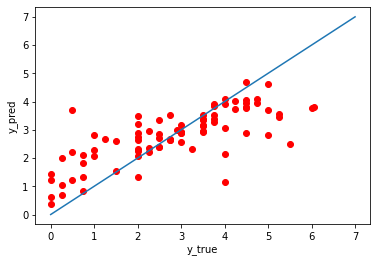

In [24]:
#Se crea gráfico con los resultados obtenidos
dataset = datalab1[[TARGET] + selected_features_svr_1].join(datalab2[selected_features_svr_2]).join(datalab3[selected_features_svr_3]).join(datalab4[selected_features_svr_4])
X, y = dataset.drop(TARGET, axis=1), np.array(dataset[TARGET])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
 
y_pred = grid_svr.best_estimator_.predict(X_test)

print('R2', grid_svr.score(X_test,y_test))

import matplotlib.pyplot as plt

z = [0,7]

plt.plot(y_test, y_pred, 'ro', z, z)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

In [25]:
#@title **Random Forest Regressor** ???????????????

from sklearn.ensemble import  RandomForestRegressor
 
# GradientBoostingRegressor / RandomForestRegressor / SVR(kernel='linear')
sel_estimator = GradientBoostingRegressor(random_state=random_state)
 
# RFE / SelectFromModel
selector = RFE(sel_estimator)
estimator = RandomForestRegressor(random_state=random_state, n_jobs=-1)
 
pipe = Pipeline([
    ('sel', selector),
    ('est', estimator)
])
 
params = {
    'sel__estimator__learning_rate': [0.05,0.1,0.2],
    'sel__n_features_to_select'    : [5],
    'est__n_estimators'            : [50,100,200,400],
    'est__criterion'               : ['mse','mae'],
    'est__max_features'            : ['auto','sqrt','log2']
}
 
grid_rfr = GridSearchCV(estimator=pipe,
                        param_grid=params,
                        scoring='r2',
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True,
                        cv=KFold(n_splits=5, shuffle=True))

In [26]:
# 9 veces cada laboratorio  LAB 1
selected_features_rfr_1 = run_process(datalab1,grid_rfr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.7min finished


R2-test-fit: 0.15648469503339457
R2-test -0.032941959549266375
MSE-test 2.6734967288392766
Best params: {'est__criterion': 'mse', 'est__max_features': 'sqrt', 'est__n_estimators': 200, 'sel__estimator__learning_rate': 0.2, 'sel__n_features_to_select': 5}
Selected features: ['ct_lab1', 'rtr_lab1', 'cer_lab1', 'actq1_lab1', 'actq3_lab1']


In [27]:
selected_features_rfr_2 = run_process(datalab2,grid_rfr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.7min finished


R2-test-fit: -0.018095746954170443
R2-test -0.11301249609564001
MSE-test 2.84100540864934
Best params: {'est__criterion': 'mse', 'est__max_features': 'sqrt', 'est__n_estimators': 400, 'sel__estimator__learning_rate': 0.05, 'sel__n_features_to_select': 5}
Selected features: ['ut_lab2', 'rt_lab2', 'actq1_lab2', 'mean(qact$_lab2)', 'mean(qavt$_lab2)']


In [28]:
selected_features_rfr_3 = run_process(datalab3,grid_rfr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.6min finished


R2-test-fit: 0.12379887449004692
R2-test 0.3071248137683775
MSE-test 1.7571345654761903
Best params: {'est__criterion': 'mae', 'est__max_features': 'log2', 'est__n_estimators': 100, 'sel__estimator__learning_rate': 0.05, 'sel__n_features_to_select': 5}
Selected features: ['ut_lab3', 'act_lab3', 'rt_lab3', 'actq1_lab3', 'avgtime_lab3']


In [29]:
selected_features_rfr_4 = run_process(datalab4,grid_rfr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.6min finished


R2-test-fit: 0.18982981180504127
R2-test -0.03737131604175681
MSE-test 2.5823852695578804
Best params: {'est__criterion': 'mse', 'est__max_features': 'sqrt', 'est__n_estimators': 50, 'sel__estimator__learning_rate': 0.2, 'sel__n_features_to_select': 5}
Selected features: ['g_lab4', 'rtr_lab4', 'actq1_lab4', 'actq2_lab4', 'mean(qc$_lab4)']


In [30]:
estimator = RandomForestRegressor(random_state=random_state, n_jobs=-1)
 
params = {
    'n_estimators'  : [50,100,200,400],
    'criterion'     : ['mse','mae'],
    'max_features'  : ['auto','sqrt','log2']
}
 
grid_rfr = GridSearchCV(estimator=estimator,
                        param_grid=params,
                        scoring='r2',
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True,
                        cv=KFold(n_splits=5, shuffle=True))

In [31]:
#Combinación de laboratorios
dataset = datalab1[[TARGET] + selected_features_rfr_1].join(datalab2[selected_features_rfr_2])
run_process(dataset,grid_rfr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.7s finished


R2-test-fit: 0.010421397773547248
R2-test 0.08380392277509674
MSE-test 2.049888416459987
Best params: {'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 400}


['ct_lab1',
 'rtr_lab1',
 'cer_lab1',
 'actq1_lab1',
 'actq3_lab1',
 'ut_lab2',
 'rt_lab2',
 'actq1_lab2',
 'mean(qact$_lab2)',
 'mean(qavt$_lab2)']

In [32]:
#Lab 1,2,3
dataset = datalab1[[TARGET] + selected_features_rfr_1].join(datalab2[selected_features_rfr_2]).join(datalab3[selected_features_rfr_3])
run_process(dataset,grid_rfr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   16.0s finished


R2-test-fit: 0.2027638532757457
R2-test 0.12983179492337216
MSE-test 1.9741410863095237
Best params: {'criterion': 'mae', 'max_features': 'sqrt', 'n_estimators': 100}


['ct_lab1',
 'rtr_lab1',
 'cer_lab1',
 'actq1_lab1',
 'actq3_lab1',
 'ut_lab2',
 'rt_lab2',
 'actq1_lab2',
 'mean(qact$_lab2)',
 'mean(qavt$_lab2)',
 'ut_lab3',
 'act_lab3',
 'rt_lab3',
 'actq1_lab3',
 'avgtime_lab3']

In [33]:
#Lab 1,2,3,4
dataset = datalab1[[TARGET] + selected_features_rfr_1].join(datalab2[selected_features_rfr_2]).join(datalab3[selected_features_rfr_3]).join(datalab4[selected_features_rfr_4])
run_process(dataset,grid_rfr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   17.7s finished


R2-test-fit: 0.24446863395794322
R2-test 0.14342676987449687
MSE-test 1.9213762440476192
Best params: {'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 100}


['ct_lab1',
 'rtr_lab1',
 'cer_lab1',
 'actq1_lab1',
 'actq3_lab1',
 'ut_lab2',
 'rt_lab2',
 'actq1_lab2',
 'mean(qact$_lab2)',
 'mean(qavt$_lab2)',
 'ut_lab3',
 'act_lab3',
 'rt_lab3',
 'actq1_lab3',
 'avgtime_lab3',
 'g_lab4',
 'rtr_lab4',
 'actq1_lab4',
 'actq2_lab4',
 'mean(qc$_lab4)']

In [34]:
#@title **Linear Regression** REGRESION LINEAL

from sklearn.linear_model import LinearRegression
 
# GradientBoostingRegressor / RandomForestRegressor / SVR(kernel='linear')
sel_estimator = GradientBoostingRegressor(random_state=random_state)
 
# RFE / SelectFromModel
selector = RFE(sel_estimator)
estimator = LinearRegression()

pipe = Pipeline([
    ('sel', selector),
    ('est', estimator)
])
 
# params = {'est__n_jobs': [-1], 
#           'est__normalize': [True], 
#           'sel__estimator__learning_rate': [0.1], 
#           'sel__estimator__n_estimators': [100], 
#           'sel__max_features': [10], 
#           'sel__prefit': [False]}

params = {
    'sel__n_features_to_select' : [5],
    'sel__step'                 : [1,2],
    'est__n_jobs'               : [-1],
}
 
grid_lr = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       scoring='r2',
                       verbose=1,
                       n_jobs=-1,
                       return_train_score=True,
                       cv=KFold(n_splits=5, shuffle=True))

In [35]:
#Ejecución por cada laboratorio 10 veces LAB1 
selected_features_lr_1 = run_process(datalab1,grid_lr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished


R2-test-fit: -0.039115662577532274
R2-test -0.08542047328877844
MSE-test 2.6884169923020687
Best params: {'est__n_jobs': -1, 'sel__n_features_to_select': 5, 'sel__step': 1}
Selected features: ['ut_lab1', 'rtr_lab1', 'actq1_lab1', 'actq2_lab1', 'mean(qmsr$_lab1)']


In [36]:
selected_features_lr_2 = run_process(datalab2,grid_lr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


R2-test-fit: -0.07139338539186058
R2-test -0.0700585363584354
MSE-test 2.555593914434384
Best params: {'est__n_jobs': -1, 'sel__n_features_to_select': 5, 'sel__step': 1}
Selected features: ['act_lab2', 'actq1_lab2', 'actq3_lab2', 'mean(qact$_lab2)', 'avgtime_lab2']


In [37]:
selected_features_lr_3 = run_process(datalab3,grid_lr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


R2-test-fit: 0.0631262032950449
R2-test -0.5319301437463944
MSE-test 3.46146302976157
Best params: {'est__n_jobs': -1, 'sel__n_features_to_select': 5, 'sel__step': 2}
Selected features: ['act_lab3', 'rt_lab3', 'rtr_lab3', 'err_lab3', 'actq2_lab3']


In [38]:
selected_features_lr_4 = run_process(datalab4,grid_lr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


R2-test-fit: 0.057554512101204366
R2-test 0.2580964025049106
MSE-test 1.8179340366868868
Best params: {'est__n_jobs': -1, 'sel__n_features_to_select': 5, 'sel__step': 2}
Selected features: ['rtr_lab4', 'err_lab4', 'cer_lab4', 'mean(qavt$_lab4)', 'mean(qc$_lab4)']


In [39]:
estimator = LinearRegression()
 
params = {
    'n_jobs'    : [-1],
}
 
grid_lr = GridSearchCV(estimator=estimator,
                       param_grid=params,
                       scoring='r2',
                       verbose=1,
                       n_jobs=-1,
                       return_train_score=True,
                       cv=KFold(n_splits=5, shuffle=True))

In [40]:
selected_features_lr_1 = ['actq3_lab1','actq1_lab1','mean(qmsr$_lab1)','rtr_lab1','cer_lab1']
selected_features_lr_2 = ['actq3_lab2','actq1_lab2','mean(qavt$_lab2)','avgtime_lab2','rt_lab2']
selected_features_lr_3 = ['rt_lab3','actq1_lab3','ut_lab3','mean(qact$_lab3)','cer_lab3']
selected_features_lr_4 = ['rt_lab4','cer_lab4','err_lab4','actq1_lab4','mean(qc$_lab4)']

In [41]:
# Combinación de laboratorios LR  (1 y 2)
dataset = datalab1[[TARGET] + selected_features_lr_1].join(datalab2[selected_features_lr_2])
run_process(dataset,grid_lr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


R2-test-fit: -0.03501798387094361
R2-test -0.17181701099692348
MSE-test 2.966399294676343
Best params: {'n_jobs': -1}


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


['actq3_lab1',
 'actq1_lab1',
 'mean(qmsr$_lab1)',
 'rtr_lab1',
 'cer_lab1',
 'actq3_lab2',
 'actq1_lab2',
 'mean(qavt$_lab2)',
 'avgtime_lab2',
 'rt_lab2']

In [42]:
#1,2,3
dataset = datalab1[[TARGET] + selected_features_lr_1].join(datalab2[selected_features_lr_2]).join(datalab3[selected_features_lr_3])
run_process(dataset,grid_lr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


R2-test-fit: 0.012498569145814842
R2-test 0.0946209769218439
MSE-test 2.3491900691953846
Best params: {'n_jobs': -1}


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


['actq3_lab1',
 'actq1_lab1',
 'mean(qmsr$_lab1)',
 'rtr_lab1',
 'cer_lab1',
 'actq3_lab2',
 'actq1_lab2',
 'mean(qavt$_lab2)',
 'avgtime_lab2',
 'rt_lab2',
 'rt_lab3',
 'actq1_lab3',
 'ut_lab3',
 'mean(qact$_lab3)',
 'cer_lab3']

In [43]:
#1,2,3 y 4
dataset = datalab1[[TARGET] + selected_features_lr_1].join(datalab2[selected_features_lr_2]).join(datalab3[selected_features_lr_3]).join(datalab4[selected_features_lr_4])
run_process(dataset,grid_lr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2-test-fit: 0.1625791624535387
R2-test 0.1384856749093697
MSE-test 2.034743970793914
Best params: {'n_jobs': -1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


['actq3_lab1',
 'actq1_lab1',
 'mean(qmsr$_lab1)',
 'rtr_lab1',
 'cer_lab1',
 'actq3_lab2',
 'actq1_lab2',
 'mean(qavt$_lab2)',
 'avgtime_lab2',
 'rt_lab2',
 'rt_lab3',
 'actq1_lab3',
 'ut_lab3',
 'mean(qact$_lab3)',
 'cer_lab3',
 'rt_lab4',
 'cer_lab4',
 'err_lab4',
 'actq1_lab4',
 'mean(qc$_lab4)']

In [45]:

!pip install Cython numpy
!pip install auto-sklearn

!pip install scikit-learn==0.23.0


!pip install dask distributed

"apt-get" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\ASDRB\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ASDRB\\AppData\\Local\\Temp\\pip-install-0gyzi1x1\\auto-sklearn\\setup.py'"'"'; __file__='"'"'C:\\Users\\ASDRB\\AppData\\Local\\Temp\\pip-install-0gyzi1x1\\auto-sklearn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\ASDRB\AppData\Local\Temp\pip-pip-egg-info-mphmcps0'
         cwd: C:\Users\ASDRB\AppData\Local\Temp\pip-install-0gyzi1x1\auto-sklearn\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\ASDRB\AppData\Local\Temp\pip-install-0gyzi1x1\auto-sklearn\setup.py", line 9, in <module>
        raise ValueError(
    ValueError: Detected unsupported operating system: win32. Please 

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\ASDRB\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [47]:
!pip install keras

In [51]:
!pip install tensorflow

In [52]:
#@title **ANN**

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model( nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, lr=0.01, decay=0., l1=0.01, l2=0.01,
                act = 'relu', dropout=0, input_shape=25, output_shape=1):
    '''This is a model generating function so that we can search over neural net 
    parameters and architecture'''
    
    opt = 'SGD' # keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
                                                     
    model = Sequential()
    
    # for the firt layer we need to specify the input dimensions
    first=True
    
    for i in range(nl1):
        if first:
            model.add(Dense(nn1, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn1, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl2):
        if first:
            model.add(Dense(nn2, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn2, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl3):
        if first:
            model.add(Dense(nn3, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn3, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    model.add(Dense(output_shape, activation='sigmoid'))
    model.compile(loss='mse', optimizer=opt, metrics=['mse'],)
    return model

# model class to use in the scikit random search CV 
model = KerasRegressor(build_fn=create_model, epochs=20, batch_size=20, verbose=1)

# learning algorithm parameters
lr=[1e-2, 1e-3, 1e-4]
decay=[1e-6,1e-9,0]

# activation
activation=['relu', 'sigmoid']

# numbers of layers
nl1 = [0,1,2,3]
nl2 = [0,1,2,3]
nl3 = [0,1,2,3]

# neurons in each layer
nn1=[20,50,100]
nn2=[10,40,70]
nn3=[5,15,30]
# nn1=[300,700,1400,2100]
# nn2=[100,400,800]
# nn3=[50,150,300]

# dropout and regularisation
dropout = [0, 0.1, 0.2, 0.3]
l1 = [0, 0.01, 0.003, 0.001, 0.0001]
l2 = [0, 0.01, 0.003, 0.001, 0.0001]

In [53]:
# GradientBoostingRegressor / RandomForestRegressor / SVR(kernel='linear')
sel_estimator = GradientBoostingRegressor(random_state=random_state)
 
# RFE / SelectFromModel
selector = RFE(sel_estimator)
estimator = model
 
pipe = Pipeline([
    ('sel', selector),
    ('est', estimator)
])

param_grid = {
    'sel__estimator__learning_rate': [0.05,0.1,0.2],
    'sel__n_features_to_select'    : [5],
    'est__nl1':            nl1,
    'est__nl2':            nl2,
    'est__nl3':            nl3,
    'est__nn1':            nn1,
    'est__nn2':            nn2,
    'est__nn3':            nn3,
    'est__act':            activation,
    'est__l1':             l1,
    'est__l2':             l2,
    'est__lr':             lr,
    'est__decay':          decay,
    'est__dropout':        dropout, 
    'est__input_shape':    [5],
    'est__output_shape':   [1]
}

rand_cv = RandomizedSearchCV(estimator=pipe,
                             param_distributions=param_grid,
                             verbose=100,
                             n_iter=10,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1,
                             return_train_score=True,
                             cv=KFold(n_splits=5, shuffle=True))

In [54]:
#Lab 1
run_process(datalab1, rand_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   1

['ctr_lab1', 'rtr_lab1', 'actq1_lab1', 'actq3_lab1', 'mean(qmsr$_lab1)']

In [55]:
#Lab 2
run_process(datalab2, rand_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   1

['act_lab2', 'rtr_lab2', 'actq3_lab2', 'mean(qmsr$_lab2)', 'avgtime_lab2']

In [56]:
#Lab 3
run_process(datalab3, rand_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   1

['g_lab3', 'ut_lab3', 'rt_lab3', 'actq2_lab3', 'mean(qavt$_lab3)']

In [57]:
#Lab 4
run_process(datalab4, rand_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   1

['norm_log(dis_lab4)', 'rtr_lab4', 'cer_lab4', 'actq1_lab4', 'avgtime_lab4']

In [58]:
estimator = model

param_grid = {
    'nl1':            nl1,
    'nl2':            nl2,
    'nl3':            nl3,
    'nn1':            nn1,
    'nn2':            nn2,
    'nn3':            nn3,
    'act':            activation,
    'l1':             l1,
    'l2':             l2,
    'lr':             lr,
    'decay':          decay,
    'dropout':        dropout, 
    'input_shape':    [20],
    'output_shape':   [1]
}

rand_cv = RandomizedSearchCV(estimator=estimator,
                             param_distributions=param_grid,
                             verbose=100,
                             n_iter=10,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1,
                             return_train_score=True,
                             cv=KFold(n_splits=5, shuffle=True))

In [59]:
selected_features_ann_1 = ['actq3_lab1','actq1_lab1','mean(qmsr$_lab1)','rtr_lab1','cer_lab1']
selected_features_ann_2 = ['actq3_lab2','actq1_lab2','mean(qavt$_lab2)','avgtime_lab2','rt_lab2']
selected_features_ann_3 = ['rt_lab3','actq1_lab3','ut_lab3','mean(qact$_lab3)','cer_lab3']
selected_features_ann_4 = ['rt_lab4','cer_lab4','err_lab4','actq1_lab4','mean(qc$_lab4)']

In [60]:
#Lab 1 y 2 
dataset = datalab1[[TARGET] + selected_features_ann_1].join(datalab2[selected_features_ann_2])
run_process(dataset,rand_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

['actq3_lab1',
 'actq1_lab1',
 'mean(qmsr$_lab1)',
 'rtr_lab1',
 'cer_lab1',
 'actq3_lab2',
 'actq1_lab2',
 'mean(qavt$_lab2)',
 'avgtime_lab2',
 'rt_lab2']

In [61]:
#Lab 1,2,3
dataset = datalab1[[TARGET] + selected_features_ann_1].join(datalab2[selected_features_ann_2]).join(datalab3[selected_features_ann_3])
run_process(dataset,rand_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

ValueError: in user code:

    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\ASDRB\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_10 is incompatible with the layer: expected axis -1 of input shape to have value 20 but received input with shape (None, 15)


In [62]:
dataset = datalab1[[TARGET] + selected_features_ann_1].join(datalab2[selected_features_ann_2]).join(datalab3[selected_features_ann_3]).join(datalab4[selected_features_ann_4])
run_process(dataset,rand_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

['actq3_lab1',
 'actq1_lab1',
 'mean(qmsr$_lab1)',
 'rtr_lab1',
 'cer_lab1',
 'actq3_lab2',
 'actq1_lab2',
 'mean(qavt$_lab2)',
 'avgtime_lab2',
 'rt_lab2',
 'rt_lab3',
 'actq1_lab3',
 'ut_lab3',
 'mean(qact$_lab3)',
 'cer_lab3',
 'rt_lab4',
 'cer_lab4',
 'err_lab4',
 'actq1_lab4',
 'mean(qc$_lab4)']